In [325]:
%matplotlib inline
import math
import re
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

from collections import defaultdict
from scipy.stats import pearsonr
import pandas as pd
from IPython.display import display

# Load calc agg features

In [367]:
from pathlib import Path
# Set up file paths
notebook_dir = Path.cwd().resolve()
data_save_path = (notebook_dir / '..' /  'Data').resolve()

print(f"Data path: {data_save_path}")

Data path: Y:\Studium\3. Sem UniPI\Data Analytics 4 digital Health\data_analytics_4_health_unipi\data_analytics_4_health_unipi\Data


In [368]:
DATA_DIR = (notebook_dir / '..' / '..' /  '..' /  'Data').resolve()
print(DATA_DIR)

DATASETS = {
    "heart_diagnoses_1": "heart_diagnoses_1.csv",
    "laboratory_events_codes_2": "laboratory_events_codes_2.csv",
    "microbiology_events_codes_3": "microbiology_events_codes_3.csv",
    "procedure_code_4": "procedure_code_4.csv",
}

Y:\Studium\3. Sem UniPI\Data Analytics 4 digital Health\Data


In [369]:
dfs = [pd.read_csv(f"{DATA_DIR}/{DATASETS[dataset].replace('.csv', '_agg_features.csv')}") for dataset in DATASETS.keys()]
len(dfs), 

(4,)

In [370]:
for df, name in zip(dfs, DATASETS.keys()):
    print(f"\nDataset: {name}")
    print("="*80)
    print(f"Shape: {df.shape}")
    print("Columns:")
    print(df.columns)
    display(df.head(2))
    display(df.describe())


Dataset: heart_diagnoses_1
Shape: (4864, 10)
Columns:
Index(['subject_id', 'hadm_id', 'has_heartnotes', 'age', 'gender', 'is_dead',
       'num_imaging_tests', 'num_unique_icd', 'note_time_span_hours',
       'hpi_length'],
      dtype='object')


,subject_id,hadm_id,has_heartnotes,age,gender,is_dead,num_imaging_tests,num_unique_icd,note_time_span_hours,hpi_length
0,10000980,26913865,1,75.0,F,1,4,1,0.0,1058.0
1,10000980,29654838,1,75.0,F,1,3,1,0.0,770.0


,subject_id,hadm_id,has_heartnotes,age,is_dead,num_imaging_tests,num_unique_icd,note_time_span_hours,hpi_length
count,4.864000e+03,4.864000e+03,4864.0,1363.000000,4864.000000,4864.000000,4864.0,4864.0,4864.000000
mean,1.510717e+07,2.501745e+07,1.0,68.978723,0.081826,3.297081,1.0,0.0,1728.680715
std,2.938761e+06,2.873736e+06,0.0,14.973358,0.274127,0.529166,0.0,0.0,676.873262
min,1.000098e+07,2.000446e+07,1.0,18.000000,0.000000,2.000000,1.0,0.0,21.000000
25%,1.252385e+07,2.260252e+07,1.0,60.000000,0.000000,3.000000,1.0,0.0,1281.000000
50%,1.507553e+07,2.503238e+07,1.0,70.000000,0.000000,3.000000,1.0,0.0,1667.000000
75%,1.764939e+07,2.746833e+07,1.0,81.000000,0.000000,4.000000,1.0,0.0,2099.500000
max,1.999860e+07,2.999967e+07,1.0,95.000000,1.000000,6.000000,1.0,0.0,9085.000000



Dataset: laboratory_events_codes_2
Shape: (4855, 34)
Columns:
Index(['subject_id', 'hadm_id', 'num_labs', 'abnormal_ratio', 'qc_fail_ratio',
       'lab_time_span_hours', 'unique_lab_tests', 'unique_examination_groups',
       'fluid_diversity', 'unique_analysis_batches', 'has_labs',
       'max_blood_glucose', 'max_blood_lactate', 'max_blood_anion gap',
       'max_blood_creatinine', 'max_blood_urea nitrogen',
       'max_blood_potassium', 'max_blood_sodium', 'min_blood_hemoglobin',
       'min_blood_hematocrit', 'max_blood_c-reactive protein',
       'max_urine_glucose', 'max_urine_creatinine', 'max_urine_urea nitrogen',
       'max_urine_sodium', 'max_urine_protein', 'max_gas_pO2', 'max_gas_pCO2',
       'max_gas_pH', 'max_gas_base excess', 'count_cbc', 'count_blood_gas',
       'count_liver', 'count_cardiac'],
      dtype='object')


,subject_id,hadm_id,num_labs,abnormal_ratio,qc_fail_ratio,lab_time_span_hours,unique_lab_tests,unique_examination_groups,fluid_diversity,unique_analysis_batches,...,max_urine_sodium,max_urine_protein,max_gas_pO2,max_gas_pCO2,max_gas_pH,max_gas_base excess,count_cbc,count_blood_gas,count_liver,count_cardiac
0,10000980,26913865.0,166,0.0,0.024096,140.466667,45,12,1,136,...,NaN,NaN,NaN,NaN,73.2000,NaN,59.0,0.0,7.0,10.0
1,10000980,29654838.0,59,0.0,0.000000,33.433333,35,8,1,53,...,NaN,NaN,NaN,NaN,1.7119,NaN,18.0,0.0,2.0,7.0


,subject_id,hadm_id,num_labs,abnormal_ratio,qc_fail_ratio,lab_time_span_hours,unique_lab_tests,unique_examination_groups,fluid_diversity,unique_analysis_batches,...,max_urine_sodium,max_urine_protein,max_gas_pO2,max_gas_pCO2,max_gas_pH,max_gas_base excess,count_cbc,count_blood_gas,count_liver,count_cardiac
count,4.855000e+03,4.855000e+03,4855.000000,4855.000000,4855.000000,4855.000000,4855.000000,4855.000000,4855.000000,4855.000000,...,676.000000,903.000000,1202.000000,1197.000000,4713.000000,1203.000000,4855.000000,4855.000000,4855.000000,4855.000000
mean,1.510805e+07,2.501709e+07,240.493306,0.000086,0.020154,115.134343,47.647168,9.218332,1.552626,119.398764,...,57.590237,85.225692,26.367305,6.441000,59.284682,2.929343,69.267971,23.490834,5.736972,7.646344
std,2.939544e+06,2.874953e+06,513.277369,0.000800,0.014587,111.872999,21.559055,5.192832,0.645785,72.279992,...,33.727525,113.275414,18.725899,1.798151,105.428314,5.146037,121.124737,164.087887,20.387880,9.589104
min,1.000098e+07,2.000446e+07,3.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,3.000000,...,10.000000,0.100000,2.261000,3.059000,0.516800,-15.000000,0.000000,0.000000,0.000000,0.000000
25%,1.251722e+07,2.260072e+07,79.000000,0.000000,0.011236,44.233333,31.000000,6.000000,1.000000,67.000000,...,29.000000,30.000000,10.640000,5.320000,1.356600,0.000000,27.000000,0.000000,0.000000,3.000000
50%,1.507734e+07,2.503202e+07,136.000000,0.000000,0.019002,81.100000,43.000000,8.000000,1.000000,103.000000,...,54.000000,30.000000,19.152000,6.118000,60.200000,2.000000,42.000000,0.000000,0.000000,6.000000
75%,1.765293e+07,2.746949e+07,259.000000,0.000000,0.027141,149.150000,60.000000,11.000000,2.000000,158.000000,...,81.000000,100.000000,43.191750,7.182000,85.000000,5.000000,80.000000,6.000000,5.000000,10.000000
max,1.999860e+07,2.999967e+07,22580.000000,0.019802,0.285714,1257.800000,175.000000,54.000000,5.000000,543.000000,...,212.000000,660.000000,73.017000,19.152000,3825.000000,33.000000,4840.000000,8875.000000,910.000000,240.000000



Dataset: microbiology_events_codes_3
Shape: (2756, 10)
Columns:
Index(['subject_id', 'hadm_id', 'has_micro', 'total_microbio_events',
       'unique_specimen_types', 'num_intermediate', 'resistant_ratio',
       'susceptible_ratio', 'micro_qc_fail', 'micro_qc_warn'],
      dtype='object')


,subject_id,hadm_id,has_micro,total_microbio_events,unique_specimen_types,num_intermediate,resistant_ratio,susceptible_ratio,micro_qc_fail,micro_qc_warn
0,10000980,26913865.0,1,1,1,0,0.0,0.0,0,0
1,10002155,23822395.0,1,12,4,0,0.0,0.0,0,2


,subject_id,hadm_id,has_micro,total_microbio_events,unique_specimen_types,num_intermediate,resistant_ratio,susceptible_ratio,micro_qc_fail,micro_qc_warn
count,2.756000e+03,2.756000e+03,2756.0,2756.000000,2756.000000,2756.000000,2756.000000,2756.000000,2756.000000,2756.000000
mean,1.561649e+07,2.503819e+07,1.0,5.655298,2.033745,0.056967,0.022155,0.108720,0.282656,0.570392
std,3.105062e+06,2.879683e+06,0.0,8.387583,1.431543,0.336555,0.097512,0.266053,0.671648,1.085349
min,1.000098e+07,2.000790e+07,1.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.294230e+07,2.262280e+07,1.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.569462e+07,2.506436e+07,1.0,2.500000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.847125e+07,2.752187e+07,1.0,7.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.999767e+07,2.999967e+07,1.0,122.000000,15.000000,5.000000,1.000000,1.000000,7.000000,12.000000



Dataset: procedure_code_4
Shape: (3459, 6)
Columns:
Index(['subject_id', 'hadm_id', 'has_procedure', 'total_procedures',
       'unique_icd_codes', 'procedure_span_days'],
      dtype='object')


,subject_id,hadm_id,has_procedure,total_procedures,unique_icd_codes,procedure_span_days
0,10000980,26913865,1,7,7,0.0
1,10002013,24760295,1,2,2,0.0


,subject_id,hadm_id,has_procedure,total_procedures,unique_icd_codes,procedure_span_days
count,3.459000e+03,3.459000e+03,3459.0,3459.000000,3459.000000,3459.000000
mean,1.499381e+07,2.502943e+07,1.0,4.191096,4.058398,1.442324
std,2.868527e+06,2.853466e+06,0.0,2.989024,2.717689,3.541510
min,1.000098e+07,2.000790e+07,1.0,1.000000,1.000000,0.000000
25%,1.249509e+07,2.264270e+07,1.0,2.000000,2.000000,0.000000
50%,1.495295e+07,2.506423e+07,1.0,3.000000,3.000000,0.000000
75%,1.747168e+07,2.747180e+07,1.0,6.000000,6.000000,1.000000
max,1.999850e+07,2.999967e+07,1.0,28.000000,21.000000,43.000000


In [371]:
# all_cols = ['subject_id', 'hadm_id', 'has_heartnotes', 'age', 'gender', 'is_dead',
#        'num_imaging_tests', 'num_unique_icd', 'note_time_span_hours'  , 'num_labs', 'abnormal_ratio', 'qc_fail_ratio',
#        'lab_time_span_hours', 'unique_lab_tests', 'unique_examination_groups',
#        'fluid_diversity', 'unique_analysis_batches', 'has_labs',
#        'max_blood_glucose', 'max_blood_lactate', 'max_blood_anion gap',
#        'max_blood_creatinine', 'max_blood_urea nitrogen',
#        'max_blood_potassium', 'max_blood_sodium', 'min_blood_hemoglobin',
#        'min_blood_hematocrit', 'max_blood_c-reactive protein',
#        'max_urine_glucose', 'max_urine_creatinine', 'max_urine_urea nitrogen',
#        'max_urine_sodium', 'max_urine_protein', 'max_gas_pO2', 'max_gas_pCO2',
#        'max_gas_pH', 'max_gas_base excess', 'count_cbc', 'count_blood_gas',
#        'count_liver', 'count_cardiac',  'has_micro', 'total_microbio_events',
#        'unique_specimen_types', 'num_intermediate', 'resistant_ratio',
#        'susceptible_ratio', 'micro_qc_fail', 'micro_qc_warn', 'has_procedure', 'total_procedures',
#        'unique_icd_codes', 'procedure_span_days' ]
# len(all_cols)

# Merge

In [372]:
from functools import reduce

# Merge all on ['subject_id', 'hadm_id']
patient_profile = reduce(
    lambda left, right: pd.merge(left, right, on=['subject_id', 'hadm_id'], how='outer'),
    dfs
)

In [373]:
len(patient_profile.columns), patient_profile.columns

(54,
 Index(['subject_id', 'hadm_id', 'has_heartnotes', 'age', 'gender', 'is_dead',
        'num_imaging_tests', 'num_unique_icd', 'note_time_span_hours',
        'hpi_length', 'num_labs', 'abnormal_ratio', 'qc_fail_ratio',
        'lab_time_span_hours', 'unique_lab_tests', 'unique_examination_groups',
        'fluid_diversity', 'unique_analysis_batches', 'has_labs',
        'max_blood_glucose', 'max_blood_lactate', 'max_blood_anion gap',
        'max_blood_creatinine', 'max_blood_urea nitrogen',
        'max_blood_potassium', 'max_blood_sodium', 'min_blood_hemoglobin',
        'min_blood_hematocrit', 'max_blood_c-reactive protein',
        'max_urine_glucose', 'max_urine_creatinine', 'max_urine_urea nitrogen',
        'max_urine_sodium', 'max_urine_protein', 'max_gas_pO2', 'max_gas_pCO2',
        'max_gas_pH', 'max_gas_base excess', 'count_cbc', 'count_blood_gas',
        'count_liver', 'count_cardiac', 'has_micro', 'total_microbio_events',
        'unique_specimen_types', 'num_interm

In [374]:
# Targeted NA handling
has_cols = [c for c in patient_profile.columns if c.startswith('has_')]
print(has_cols)
# Fill indicators with 0 (absent)
patient_profile[has_cols] = patient_profile[has_cols].fillna(0).astype(int)

['has_heartnotes', 'has_labs', 'has_micro', 'has_procedure']


In [375]:
# Identify numeric columns (exclude ids/flags)
numeric_cols = [c for c in patient_profile.select_dtypes(include='number').columns
                if c not in ('subject_id', 'hadm_id')]

# Heuristic: detect count-like columns and fill zeros when corresponding has_* indicates absence
count_like_keywords = ('num_', 'total_', 'unique_', 'count', '_count')
count_cols = [c for c in numeric_cols if any(k in c for k in count_like_keywords)]
count_cols

['num_imaging_tests',
 'num_unique_icd',
 'num_labs',
 'unique_lab_tests',
 'unique_examination_groups',
 'unique_analysis_batches',
 'count_cbc',
 'count_blood_gas',
 'count_liver',
 'count_cardiac',
 'total_microbio_events',
 'unique_specimen_types',
 'num_intermediate',
 'total_procedures',
 'unique_icd_codes']

In [376]:
# mapping heuristics from feature name -> has_ flag (extend if needed)
map_keywords = {
    'lab': 'has_labs',
    'micro': 'has_micro',
    'procedure': 'has_procedure',
    'proc': 'has_procedure',
    'note': 'has_heartnotes',
}

for col in count_cols:
    filled = False
    lname = col.lower()
    for key, has_flag in map_keywords.items():
        if key in lname and has_flag in patient_profile.columns:
            patient_profile.loc[patient_profile[has_flag] == 0, col] = 0
            filled = True
            break
    if not filled:
        # safe fallback: fill remaining NaNs with 0 (counts mean absence)
        patient_profile[col] = patient_profile[col].fillna(0)

# Measurements / statistics: keep NaN but create missing indicators
exclude_from_measure = set(count_cols) | set(has_cols) | {'subject_id', 'hadm_id'}
measurement_cols = [c for c in numeric_cols if c not in exclude_from_measure and c != 'is_dead']

for c in measurement_cols:
    patient_profile[c + '_missing'] = patient_profile[c].isna().astype(int)

In [377]:
patient_profile.describe()

,subject_id,hadm_id,has_heartnotes,age,is_dead,num_imaging_tests,num_unique_icd,note_time_span_hours,hpi_length,num_labs,...,max_urine_protein_missing,max_gas_pO2_missing,max_gas_pCO2_missing,max_gas_pH_missing,max_gas_base excess_missing,resistant_ratio_missing,susceptible_ratio_missing,micro_qc_fail_missing,micro_qc_warn_missing,procedure_span_days_missing
count,5.166000e+03,5.166000e+03,5166.000000,1363.000000,4864.000000,5166.000000,5166.000000,4864.0,4864.000000,5166.000000,...,5166.000000,5166.000000,5166.000000,5166.000000,5166.000000,5166.000000,5166.000000,5166.000000,5166.000000,5166.000000
mean,1.539306e+07,2.501832e+07,0.941541,68.978723,0.081826,3.104336,0.941541,0.0,1728.680715,226.015292,...,0.825203,0.767325,0.768293,0.087689,0.767131,0.466512,0.466512,0.466512,0.466512,0.330430
std,3.073751e+06,2.871364e+06,0.234632,14.973358,0.274127,0.928495,0.234632,0.0,676.873262,500.862472,...,0.379830,0.422578,0.421964,0.282869,0.422700,0.498926,0.498926,0.498926,0.498926,0.470413
min,1.000098e+07,2.000446e+07,0.000000,18.000000,0.000000,0.000000,0.000000,0.0,21.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.267767e+07,2.261127e+07,1.000000,60.000000,0.000000,3.000000,1.000000,0.0,1281.000000,69.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.539807e+07,2.502269e+07,1.000000,70.000000,0.000000,3.000000,1.000000,0.0,1667.000000,126.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.812905e+07,2.746995e+07,1.000000,81.000000,0.000000,4.000000,1.000000,0.0,2099.500000,247.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.999860e+07,2.999967e+07,1.000000,95.000000,1.000000,6.000000,1.000000,0.0,9085.000000,22580.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [378]:
patient_profile.head()

,subject_id,hadm_id,has_heartnotes,age,gender,is_dead,num_imaging_tests,num_unique_icd,note_time_span_hours,hpi_length,...,max_urine_protein_missing,max_gas_pO2_missing,max_gas_pCO2_missing,max_gas_pH_missing,max_gas_base excess_missing,resistant_ratio_missing,susceptible_ratio_missing,micro_qc_fail_missing,micro_qc_warn_missing,procedure_span_days_missing
0,10000980,26913865.0,1,75.0,F,1.0,4.0,1.0,0.0,1058.0,...,1,1,1,0,1,0,0,0,0,0
1,10000980,29654838.0,1,75.0,F,1.0,3.0,1.0,0.0,770.0,...,1,1,1,0,1,1,1,1,1,1
2,10002013,24760295.0,1,NaN,F,0.0,4.0,1.0,0.0,2007.0,...,1,1,1,0,1,1,1,1,1,0
3,10002155,23822395.0,1,NaN,F,0.0,3.0,1.0,0.0,1752.0,...,1,0,0,0,0,0,0,0,0,0
4,10004457,28723315.0,1,66.0,M,0.0,3.0,1.0,0.0,1783.0,...,1,1,1,0,1,1,1,1,1,1


# Completeness Analysis

In [379]:
# Identify the 'has_' indicator columns
has_columns = [col for col in patient_profile.columns if col.startswith('has_')]
print(f"Data source indicators: {has_columns}")

Data source indicators: ['has_heartnotes', 'has_labs', 'has_micro', 'has_procedure']



COMPLETENESS SUMMARY

Per-Source Availability:
  has_heartnotes: 4,864 patients (94.2%)
  has_labs: 4,855 patients (94.0%)
  has_micro: 2,756 patients (53.3%)
  has_procedure: 3,459 patients (67.0%)

--------------------------------------------------------------------------------
DATA SOURCE COMBINATIONS:
--------------------------------------------------------------------------------
  [1-1-1-1] heartnotes, labs, micro, procedure: 1,932 (37.4%)
  [1-1-0-1] heartnotes, labs, procedure: 1,525 (29.5%)
  [1-1-0-0] heartnotes, labs: 876 (17.0%)
  [1-1-1-0] heartnotes, labs, micro: 522 (10.1%)
  [0-0-1-0] micro: 302 (5.8%)
  [1-0-0-0] heartnotes: 7 (0.1%)
  [1-0-0-1] heartnotes, procedure: 2 (0.0%)


C:\Users\dgars\AppData\Local\Temp\ipykernel_21744\1571333312.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(sources, rotation=45, ha='right')


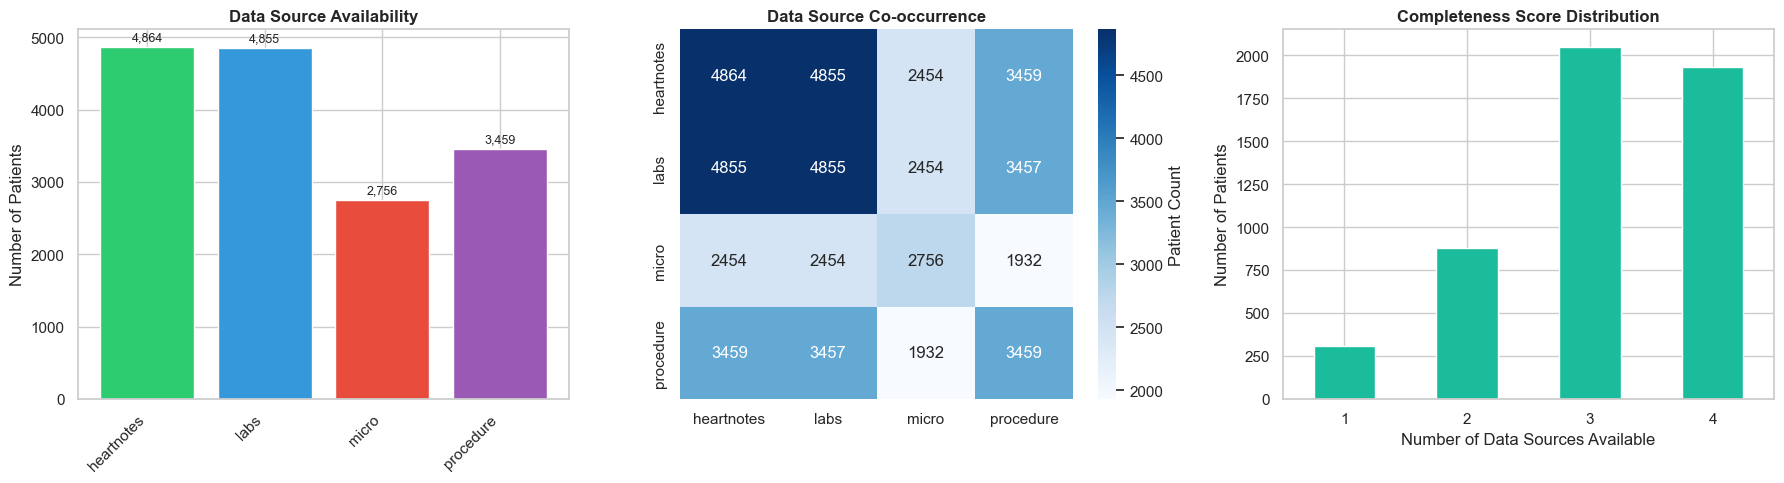


COMPLETENESS SCORE SUMMARY

Total patients: 5,166
Patients with ALL sources: 1,932
Patients with NO sources: 0
Average sources per patient: 3.08


In [380]:
# Completeness Matrix - Check which data sources are available for each patient
completeness = patient_profile[has_columns].copy()

# Summary statistics
print("\n" + "="*80)
print("COMPLETENESS SUMMARY")
print("="*80)

# Per-source completeness
print("\nPer-Source Availability:")
for col in has_columns:
    count = (patient_profile[col] == 1).sum()
    pct = count / len(patient_profile) * 100
    print(f"  {col}: {count:,} patients ({pct:.1f}%)")

# Combination completeness
print("\n" + "-"*80)
print("DATA SOURCE COMBINATIONS:")
print("-"*80)

# Create a combined key for each row
completeness['combination'] = completeness[has_columns].astype(int).astype(str).agg('-'.join, axis=1)
combo_counts = completeness['combination'].value_counts()

# Create readable labels
for combo, count in combo_counts.items():
    sources = [has_columns[i].replace('has_', '') for i, val in enumerate(combo.split('-')) if val == '1']
    sources_str = ', '.join(sources) if sources else 'None'
    pct = count / len(patient_profile) * 100
    print(f"  [{combo}] {sources_str}: {count:,} ({pct:.1f}%)")

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Bar chart of individual source availability
ax1 = axes[0]
source_counts = [(col.replace('has_', ''), (patient_profile[col] == 1).sum()) for col in has_columns]
sources, counts = zip(*source_counts)
bars = ax1.bar(sources, counts, color=['#2ecc71', '#3498db', '#e74c3c', '#9b59b6'][:len(has_columns)])
ax1.set_ylabel('Number of Patients')
ax1.set_title('Data Source Availability', fontweight='bold')
ax1.set_xticklabels(sources, rotation=45, ha='right')
for bar, count in zip(bars, counts):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, 
             f'{count:,}', ha='center', va='bottom', fontsize=9)

# Plot 2: Heatmap of co-occurrence
ax2 = axes[1]
cooccurrence = pd.DataFrame(index=has_columns, columns=has_columns, dtype=float)
for col1 in has_columns:
    for col2 in has_columns:
        both = ((patient_profile[col1] == 1) & (patient_profile[col2] == 1)).sum()
        cooccurrence.loc[col1, col2] = both

# Rename for display
cooccurrence.index = [c.replace('has_', '') for c in cooccurrence.index]
cooccurrence.columns = [c.replace('has_', '') for c in cooccurrence.columns]

sns.heatmap(cooccurrence.astype(float), annot=True, fmt='.0f', cmap='Blues', 
            ax=ax2, cbar_kws={'label': 'Patient Count'})
ax2.set_title('Data Source Co-occurrence', fontweight='bold')

# Plot 3: Completeness score distribution
ax3 = axes[2]
patient_profile['completeness_score'] = patient_profile[has_columns].sum(axis=1)
patient_profile['completeness_score'].value_counts().sort_index().plot(kind='bar', ax=ax3, color='#1abc9c')
ax3.set_xlabel('Number of Data Sources Available')
ax3.set_ylabel('Number of Patients')
ax3.set_title('Completeness Score Distribution', fontweight='bold')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.savefig(r'../plots/1.2_completeness_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Final summary
print("\n" + "="*80)
print("COMPLETENESS SCORE SUMMARY")
print("="*80)
print(f"\nTotal patients: {len(patient_profile):,}")
print(f"Patients with ALL sources: {(patient_profile['completeness_score'] == len(has_columns)).sum():,}")
print(f"Patients with NO sources: {(patient_profile['completeness_score'] == 0).sum():,}")
print(f"Average sources per patient: {patient_profile['completeness_score'].mean():.2f}")

## Encode gender

In [381]:
patient_profile["gender"].value_counts(dropna=False)

gender
M      2841
F      2017
NaN     308
Name: count, dtype: int64

In [382]:
if 'patient_profile' in globals() and 'gender' in patient_profile.columns:
    g2 = patient_profile['gender'].astype(str).str.strip().str.upper()
    patient_profile['gender_F'] = (g2 == 'F').astype(int)
    patient_profile['gender_M'] = (g2 == 'M').astype(int)
    patient_profile['gender_missing'] = (~g2.isin(['F', 'M'])).astype(int)
    # drop any legacy encoding to avoid reuse
    patient_profile = patient_profile.drop(columns=['gender_enc'], errors='ignore')
    patient_profile = patient_profile.drop(columns=['gender'], errors='ignore')

In [383]:
for col in ['gender_F', 'gender_M', 'gender_missing']:
    if col in patient_profile.columns:
        print(f"{col} counts:")
        display(patient_profile[col].value_counts(dropna=False))

gender_F counts:


gender_F
0    3149
1    2017
Name: count, dtype: int64

gender_M counts:


gender_M
1    2841
0    2325
Name: count, dtype: int64

gender_missing counts:


gender_missing
0    4858
1     308
Name: count, dtype: int64

# Save big patient profile

In [384]:
patient_profile.to_csv(os.path.join(DATA_DIR, "patient_profile_large.csv"), index=False)

# Corr

In [385]:
patient_profile.columns

Index(['subject_id', 'hadm_id', 'has_heartnotes', 'age', 'is_dead',
       'num_imaging_tests', 'num_unique_icd', 'note_time_span_hours',
       'hpi_length', 'num_labs', 'abnormal_ratio', 'qc_fail_ratio',
       'lab_time_span_hours', 'unique_lab_tests', 'unique_examination_groups',
       'fluid_diversity', 'unique_analysis_batches', 'has_labs',
       'max_blood_glucose', 'max_blood_lactate', 'max_blood_anion gap',
       'max_blood_creatinine', 'max_blood_urea nitrogen',
       'max_blood_potassium', 'max_blood_sodium', 'min_blood_hemoglobin',
       'min_blood_hematocrit', 'max_blood_c-reactive protein',
       'max_urine_glucose', 'max_urine_creatinine', 'max_urine_urea nitrogen',
       'max_urine_sodium', 'max_urine_protein', 'max_gas_pO2', 'max_gas_pCO2',
       'max_gas_pH', 'max_gas_base excess', 'count_cbc', 'count_blood_gas',
       'count_liver', 'count_cardiac', 'has_micro', 'total_microbio_events',
       'unique_specimen_types', 'num_intermediate', 'resistant_ratio',
 

In [386]:
def corr_report(df, features, data_dir=None, plot_name='selected_features_corr.png', threshold=0.60, figsize=(12,10), show_plot=True):
    """
    Compute correlation matrix for given features in df, plot heatmap, and return correlations + high-corr pairs.
    ...
    """
    import os
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    import pandas as pd

    # keep only existing requested cols
    sel = [c for c in features if c in df.columns]
    if not sel:
        raise ValueError("No requested features found in dataframe.")

    tmp = df[sel].copy()

    # one-hot encode gender into F/M/missing to avoid arbitrary numeric codes
    if 'gender' in tmp.columns:
        g = tmp['gender'].astype(str).str.strip().str.upper()
        tmp['gender_F'] = (g == 'F').astype(int)
        tmp['gender_M'] = (g == 'M').astype(int)
        tmp['gender_missing'] = (~g.isin(['F', 'M'])).astype(int)
        tmp = tmp.drop(columns=['gender'])

    # booleans -> int (FIXED: use vectorized approach)
    bool_cols = tmp.select_dtypes(include='bool').columns
    tmp[bool_cols] = tmp[bool_cols].astype(int)

    # select numeric columns only
    num_tmp = tmp.select_dtypes(include=[np.number]).copy()
    used_features = num_tmp.columns.tolist()
    if len(used_features) < 2:
        raise ValueError("Need at least two numeric features for correlation. Numeric found: " + ", ".join(used_features))

    # correlation
    corr_df = num_tmp.corr()

    # plot heatmap (mask upper triangle)
    plt.figure(figsize=figsize)
    mask = np.triu(np.ones_like(corr_df, dtype=bool))
    sns.heatmap(corr_df, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', center=0,
                cbar_kws={'label':'corr'})
    plt.title('Correlation matrix — selected features')
    plt.tight_layout()

    # save
    if data_dir is None:
        save_dir = os.path.abspath('.')
    else:
        save_dir = data_dir
    plots_dir = os.path.join(save_dir, 'plots')
    os.makedirs(plots_dir, exist_ok=True)
    save_path = os.path.join(plots_dir, plot_name)
    plt.savefig(save_path, dpi=200, bbox_inches='tight')

    if show_plot:
        plt.show()
    else:
        plt.close()

    # extract high-correlation pairs (upper triangle only)
    cols = corr_df.columns.tolist()
    high_pairs = []
    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            val = corr_df.iloc[i, j]
            if pd.notna(val) and abs(val) >= threshold:
                high_pairs.append((cols[i], cols[j], float(val)))

    # print brief report
    print(f"Correlation matrix saved to: {save_path}")
    print(f"Numeric features used ({len(used_features)}): {used_features}")
    print(f"High-corr pairs (|r| >= {threshold}): {len(high_pairs)}")
    for a,b,v in sorted(high_pairs, key=lambda x: -abs(x[2])):
        print(f"  {a} <--> {b}  :  {v:.3f}")

    return corr_df, high_pairs, used_features

In [347]:
#corr_df, high_pairs, used = corr_report(patient_profile, patient_profile.columns.tolist(), data_dir=DATA_DIR, threshold=0.80)

# Further select and compute combined features

In [ ]:
def compute_indicators_and_run_corr(df, data_dir=None, save_plots=True, corr_threshold=0.70, figsize=(10,8)):
    d = df.copy()
    
    # --- Track components to exclude later ---
    # We will add any raw column used in a formula to this set
    found_components = set()

    # 1. Activity Components
    counts = ['num_imaging_tests', 'num_labs', 'total_microbio_events', 'total_procedures']
    for c in counts:
        if c in d.columns:
            d[c] = d[c].fillna(0)
            found_components.add(c)

    # Composite: clinical_activity
    cols_for_activity = [c for c in counts if c in d.columns]
    if cols_for_activity:
        d['clinical_activity'] = np.mean([np.log1p(d[c]) for c in cols_for_activity], axis=0)

    # 2. Micro/Resistance Components
    micro_comps = ['resistant_ratio', 'unique_organisms', 'unique_specimen_types']
    for c in micro_comps:
        if c in d.columns:
            found_components.add(c)
    
    if 'resistant_ratio' in d.columns:
        rr = d['resistant_ratio'].fillna(0)
        uo = d['unique_organisms'].fillna(0) if 'unique_organisms' in d.columns else 0
        us = d['unique_specimen_types'].fillna(0) if 'unique_specimen_types' in d.columns else 0
        d['micro_resistance_score'] = rr * np.log1p(uo + us)

    # 3. History Components
    hist_comps = ['hpi_length', 'note_time_span_hours']
    for c in hist_comps:
        if c in d.columns:
            found_components.add(c)
            
    hl = d['hpi_length'].fillna(0) if 'hpi_length' in d.columns else 0
    nts = d['note_time_span_hours'].fillna(0) if 'note_time_span_hours' in d.columns else 0
    d['history_depth'] = np.log1p(hl) + np.log1p(nts)

    # 4. Procedure Density Components
    if 'total_procedures' in d.columns:
        p_span = 'procedure_span_days'
        if p_span in d.columns: found_components.add(p_span)
        pdays = d[p_span].fillna(1) if p_span in d.columns else 1
        d['procedure_density'] = d['total_procedures'] / pdays.clip(lower=1)

    # 5. Diagnosis Components
    if 'n_diagnoses' in d.columns:
        found_components.add('n_diagnoses')
        d['diagnosis_burden'] = np.log1p(d['n_diagnoses'].fillna(0))

    # --- Analyte Composite Logic ---
    def first_existing(col_candidates):
        for c in col_candidates:
            if c in d.columns:
                return c
        return None

    def robust_z_series(s):
        s = pd.to_numeric(s, errors='coerce')
        med = s.median()
        iqr = s.quantile(0.75) - s.quantile(0.25)
        denom = iqr if iqr > 0 else (s.std() if s.std() > 0 else 1.0)
        return (s.fillna(med) - med) / (denom + 1e-9)

    analyte_candidates = {
        'glucose':       ['max_blood_glucose', 'max_glucose', 'mean_glucose'],
        'lactate':       ['max_blood_lactate', 'max_lactate', 'mean_lactate', 'lactate'],
        'anion_gap':     ['max_blood_anion gap', 'max_blood_anion_gap', 'max_anion_gap', 'anion_gap'],
        'bicarbonate':   ['max_blood_bicarbonate', 'max_bicarbonate', 'total_co2', 'bicarbonate'],
        'creatinine':    ['max_blood_creatinine', 'max_creatinine', 'creatinine'],
        'urea_nitrogen': ['max_blood_urea_nitrogen', 'max_blood_urea nitrogen', 'max_urea_nitrogen', 'bun'],
        'phosphate':     ['max_blood_phosphate', 'max_phosphate', 'phosphate'],
        'potassium':     ['max_blood_potassium', 'max_potassium', 'potassium'],
        'pO2':           ['max_gas_pO2', 'max_pO2', 'po2', 'pao2'],
        'pCO2':          ['max_gas_pCO2', 'max_pCO2', 'pco2', 'paco2'],
        'pH':            ['max_gas_pH', 'max_pH', 'ph'],
        'base_excess':   ['max_gas_base excess', 'max_gas_base_excess', 'max_base_excess', 'base_excess'],
        'crp':           ['max_blood_c-reactive protein', 'max_blood_c-reactive_protein', 'max_blood_crp', 'max_crp', 'c-reactive protein'],
        'ast':           ['max_blood_ast', 'max_ast', 'ast'],
        'alt':           ['max_blood_alt', 'max_alt', 'alt'],
        'ld':            ['max_blood_ld', 'max_ld', 'ldh'],
        'hemoglobin':    ['min_blood_hemoglobin', 'min_hemoglobin', 'hemoglobin'],
        'hematocrit':    ['min_blood_hematocrit', 'min_hematocrit', 'hematocrit'],
        'rbc':           ['min_blood_rbc', 'max_rbc', 'rbc'],
        'rdw':           ['max_blood_rdw', 'max_rdw', 'rdw'],
        'urine_creatinine': ['max_urine_creatinine', 'creatinine_urine'],
        'urine_sodium':     ['max_urine_sodium', 'sodium_urine']
    }

    # Prepare Z-series and track which specific component columns were used
    z = {}
    for analyte, candidates in analyte_candidates.items():
        col = first_existing(candidates)
        if col is not None:
            found_components.add(col) # Tracking the specific raw column
            z[analyte] = robust_z_series(d[col])
        else:
            z[analyte] = pd.Series(0.0, index=d.index)

    # --- Compute the "Old" Indicators ---
    d['metabolic_stress_index'] = z['glucose'] + z['lactate'] + z['anion_gap'] - z['bicarbonate']
    d['renal_injury_score'] = z['creatinine'] + z['urea_nitrogen'] + z['phosphate'] + z['potassium']
    d['oxygenation_dysfunction_index'] = -z['pO2'] + z['pCO2'] - z['pH'] - z['base_excess']
    d['inflammation_liver_stress_index'] = z['crp'] + z['ast'] + z['alt'] + z['ld']
    d['hematologic_stability_score'] = z['hemoglobin'] + z['hematocrit'] + z['rbc'] - z['rdw']

    # --- Compute the "New" Indicators ---
    if 'max_urine_creatinine' in d.columns:
        z_urine_creat = robust_z_series(d['max_urine_creatinine'])
        d['renal_failure_index'] = z['creatinine'] - z_urine_creat
    else:
        d['renal_failure_index'] = 0.0

    d['diagnostic_intensity'] = np.log1p(
        d.get('count_blood_gas', 0) + d.get('count_cardiac', 0) + 
        d.get('count_liver', 0) + d.get('count_cbc', 0)
    )
    # Track the intensity counts as components
    for c in ['count_blood_gas', 'count_cardiac', 'count_liver', 'count_cbc']:
        if c in d.columns: found_components.add(c)

    if 'days_since_last_admission' in d.columns:
        found_components.add('days_since_last_admission')
        d['recent_admission_score'] = 1.0 / (1.0 + d['days_since_last_admission'].fillna(3650))

    # --- Define the final list of Indicators ---
    indicators = [c for c in [
        'clinical_activity', 'micro_resistance_score', 'history_depth', 
        'procedure_density', 'diagnosis_burden', 'metabolic_stress_index', 
        'renal_injury_score', 'oxygenation_dysfunction_index', 
        'inflammation_liver_stress_index', 'hematologic_stability_score',
        'renal_failure_index', 'diagnostic_intensity', 'recent_admission_score'
    ] if c in d.columns]

    # --- Define the "Remaining" list (No Components) ---
    # Every numeric column minus the indicators and minus the components used to build them
    all_numeric = set(d.select_dtypes(include='number').columns)
    excluded = set(indicators) | found_components | {'subject_id', 'hadm_id'}
    remaining_features = [c for c in all_numeric if c not in excluded and not c.endswith('_missing')]

    # --- Run Correlation Reports ---
    save_dir = os.path.abspath('.') if data_dir is None else data_dir
    corr_results = {}

    # 1) NEW INDICATORS ONLY
    name = 'new_indicators_only'
    print(f"\nRunning correlation: {name}")
    corr_results[name] = corr_report(d, indicators, data_dir=save_dir, plot_name=f'{name}_corr.png',
                                    threshold=corr_threshold, figsize=figsize, show_plot=save_plots)

    # 2) INDICATORS + REMAINING (No raw components)
    # This shows how indicators relate to things like age, mortality, gender, etc.
    name = 'indicators_plus_non_components'
    features_combo = indicators + remaining_features
    print(f"\nRunning correlation: {name} (Excluding {len(found_components)} raw components)")
    corr_results[name] = corr_report(d, features_combo, data_dir=save_dir, plot_name=f'{name}_corr.png',
                                    threshold=corr_threshold, figsize=figsize, show_plot=save_plots)

    return d, corr_results, found_components


Running correlation: new_indicators_only


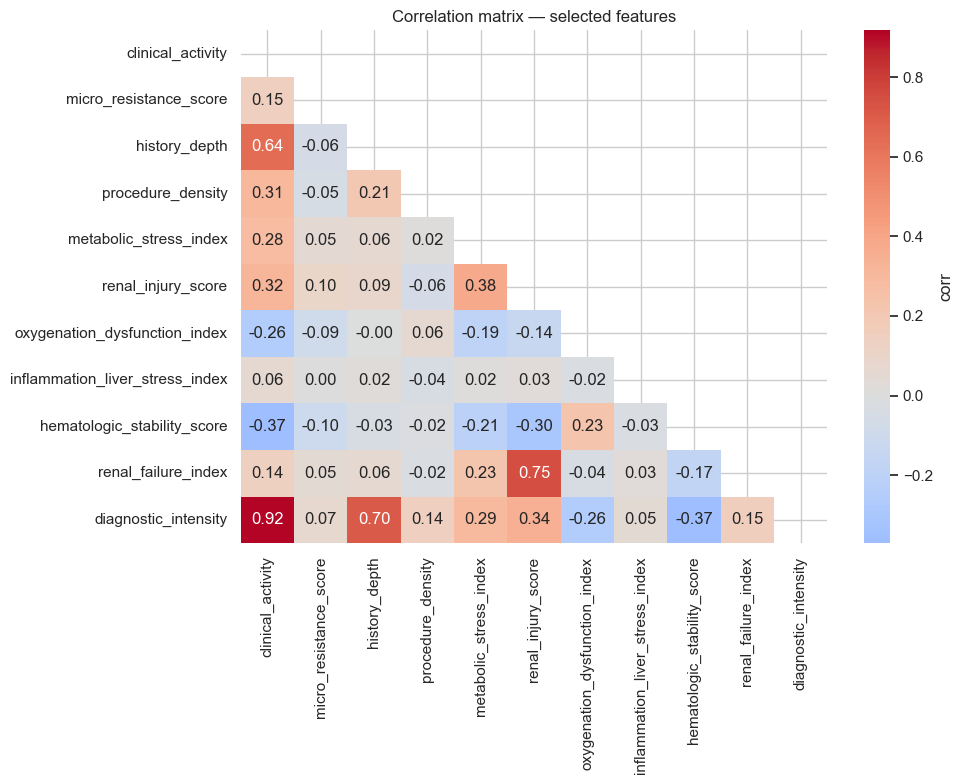

Correlation matrix saved to: Y:\Studium\3. Sem UniPI\Data Analytics 4 digital Health\Data\plots\new_indicators_only_corr.png
Numeric features used (11): ['clinical_activity', 'micro_resistance_score', 'history_depth', 'procedure_density', 'metabolic_stress_index', 'renal_injury_score', 'oxygenation_dysfunction_index', 'inflammation_liver_stress_index', 'hematologic_stability_score', 'renal_failure_index', 'diagnostic_intensity']
High-corr pairs (|r| >= 0.7): 3
  clinical_activity <--> diagnostic_intensity  :  0.917
  renal_injury_score <--> renal_failure_index  :  0.745
  history_depth <--> diagnostic_intensity  :  0.702

Running correlation: indicators_plus_non_components (Excluding 28 raw components)


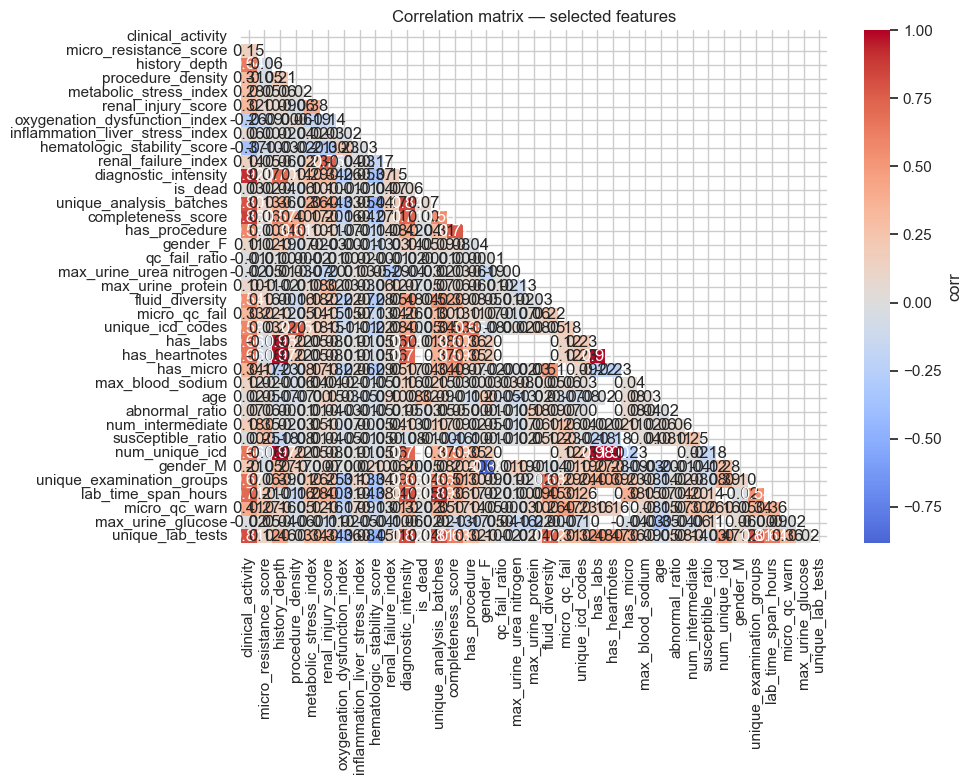

Correlation matrix saved to: Y:\Studium\3. Sem UniPI\Data Analytics 4 digital Health\Data\plots\indicators_plus_non_components_corr.png
Numeric features used (37): ['clinical_activity', 'micro_resistance_score', 'history_depth', 'procedure_density', 'metabolic_stress_index', 'renal_injury_score', 'oxygenation_dysfunction_index', 'inflammation_liver_stress_index', 'hematologic_stability_score', 'renal_failure_index', 'diagnostic_intensity', 'is_dead', 'unique_analysis_batches', 'completeness_score', 'has_procedure', 'gender_F', 'qc_fail_ratio', 'max_urine_urea nitrogen', 'max_urine_protein', 'fluid_diversity', 'micro_qc_fail', 'unique_icd_codes', 'has_labs', 'has_heartnotes', 'has_micro', 'max_blood_sodium', 'age', 'abnormal_ratio', 'num_intermediate', 'susceptible_ratio', 'num_unique_icd', 'gender_M', 'unique_examination_groups', 'lab_time_span_hours', 'micro_qc_warn', 'max_urine_glucose', 'unique_lab_tests']
High-corr pairs (|r| >= 0.7): 27
  has_heartnotes <--> num_unique_icd  :  1.0

In [410]:
patient_profile_new, corr_res, found_components = compute_indicators_and_run_corr(patient_profile, data_dir=DATA_DIR, save_plots=True)

In [404]:
found_components

{'count_blood_gas',
 'count_cardiac',
 'count_cbc',
 'count_liver',
 'hpi_length',
 'max_blood_anion gap',
 'max_blood_c-reactive protein',
 'max_blood_creatinine',
 'max_blood_glucose',
 'max_blood_lactate',
 'max_blood_potassium',
 'max_blood_urea nitrogen',
 'max_gas_base excess',
 'max_gas_pCO2',
 'max_gas_pH',
 'max_gas_pO2',
 'max_urine_creatinine',
 'max_urine_sodium',
 'min_blood_hematocrit',
 'min_blood_hemoglobin',
 'note_time_span_hours',
 'num_imaging_tests',
 'num_labs',
 'procedure_span_days',
 'resistant_ratio',
 'total_microbio_events',
 'total_procedures',
 'unique_specimen_types'}

## Drop correlated columns

In [412]:
patient_profile_new.shape

(5166, 60)

In [411]:
to_drop = [
    'has_heartnotes', 'has_labs', 'has_procedure', 'has_micro',
    'num_unique_icd', 
        'unique_analysis_batches', 
        'unique_examination_groups', 
        'completeness_score',
        'gender_M',
        'unique_icd_codes',
        'renal_injury_score',
]
to_drop = to_drop + list(found_components)
print(f"Dropping {len(to_drop)} columns used as components or indicators: {to_drop}")

patient_profile_new = patient_profile_new.drop(columns=[c for c in to_drop if c in patient_profile_new.columns])

len(final_profile.columns), patient_profile_new.columns,

Dropping 39 columns used as components or indicators: ['has_heartnotes', 'has_labs', 'has_procedure', 'has_micro', 'num_unique_icd', 'unique_analysis_batches', 'unique_examination_groups', 'completeness_score', 'gender_M', 'unique_icd_codes', 'renal_injury_score', 'max_blood_glucose', 'max_urine_creatinine', 'hpi_length', 'max_blood_lactate', 'resistant_ratio', 'min_blood_hematocrit', 'min_blood_hemoglobin', 'max_blood_c-reactive protein', 'count_cbc', 'total_microbio_events', 'num_imaging_tests', 'max_blood_potassium', 'max_blood_urea nitrogen', 'total_procedures', 'unique_specimen_types', 'max_blood_creatinine', 'num_labs', 'max_gas_pH', 'note_time_span_hours', 'count_liver', 'max_blood_anion gap', 'procedure_span_days', 'max_gas_pO2', 'max_gas_pCO2', 'count_cardiac', 'max_urine_sodium', 'max_gas_base excess', 'count_blood_gas']


(65,
 Index(['subject_id', 'hadm_id', 'age', 'is_dead', 'abnormal_ratio',
        'qc_fail_ratio', 'lab_time_span_hours', 'unique_lab_tests',
        'fluid_diversity', 'max_blood_sodium', 'max_urine_glucose',
        'max_urine_urea nitrogen', 'max_urine_protein', 'num_intermediate',
        'susceptible_ratio', 'micro_qc_fail', 'micro_qc_warn', 'age_missing',
        'note_time_span_hours_missing', 'hpi_length_missing',
        'abnormal_ratio_missing', 'qc_fail_ratio_missing',
        'lab_time_span_hours_missing', 'fluid_diversity_missing',
        'max_blood_glucose_missing', 'max_blood_lactate_missing',
        'max_blood_anion gap_missing', 'max_blood_creatinine_missing',
        'max_blood_urea nitrogen_missing', 'max_blood_potassium_missing',
        'max_blood_sodium_missing', 'min_blood_hemoglobin_missing',
        'min_blood_hematocrit_missing', 'max_blood_c-reactive protein_missing',
        'max_urine_glucose_missing', 'max_urine_creatinine_missing',
        'max_urine_ur

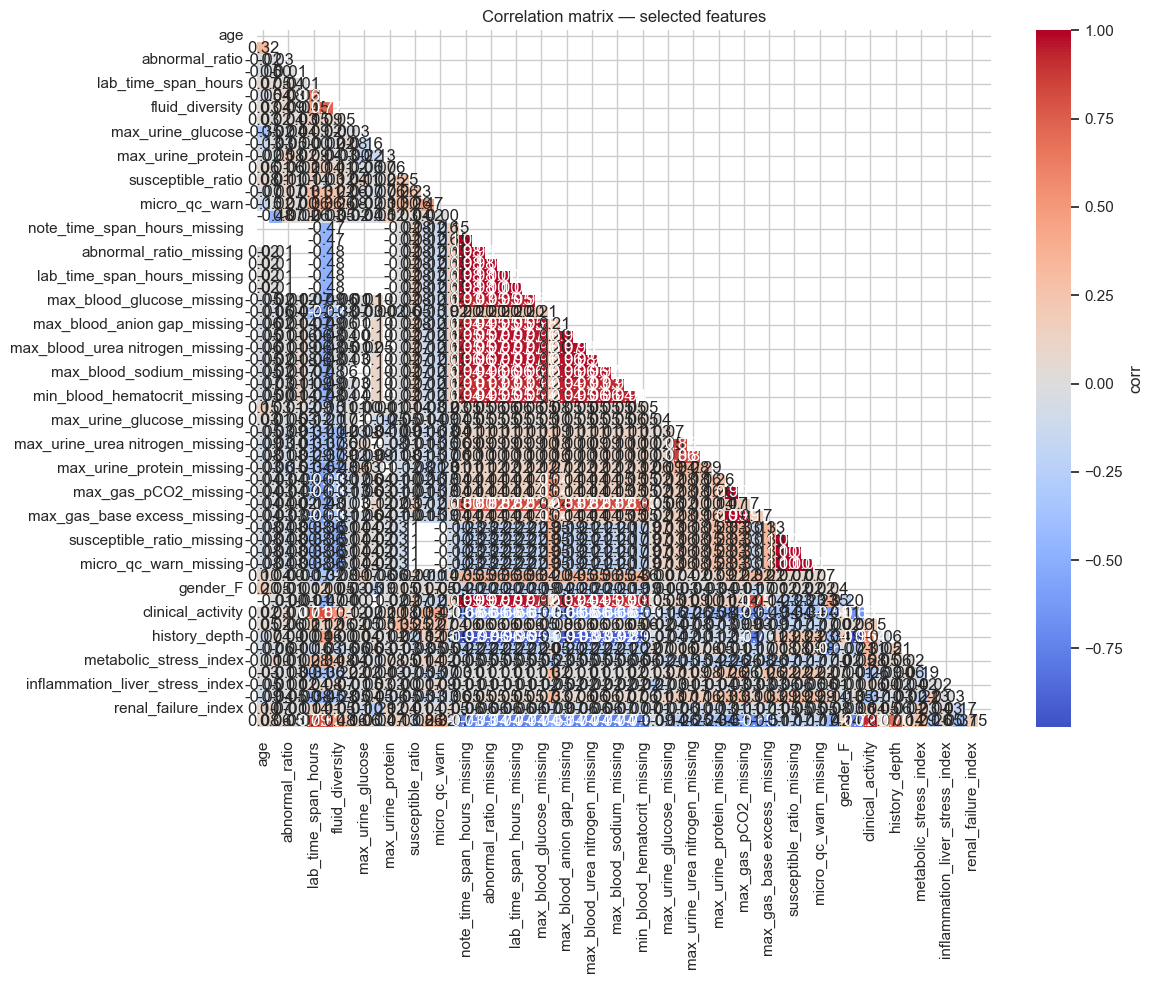

Correlation matrix saved to: Y:\Studium\3. Sem UniPI\Data Analytics 4 digital Health\Data\plots\selected_features_corr.png
Numeric features used (58): ['age', 'is_dead', 'abnormal_ratio', 'qc_fail_ratio', 'lab_time_span_hours', 'unique_lab_tests', 'fluid_diversity', 'max_blood_sodium', 'max_urine_glucose', 'max_urine_urea nitrogen', 'max_urine_protein', 'num_intermediate', 'susceptible_ratio', 'micro_qc_fail', 'micro_qc_warn', 'age_missing', 'note_time_span_hours_missing', 'hpi_length_missing', 'abnormal_ratio_missing', 'qc_fail_ratio_missing', 'lab_time_span_hours_missing', 'fluid_diversity_missing', 'max_blood_glucose_missing', 'max_blood_lactate_missing', 'max_blood_anion gap_missing', 'max_blood_creatinine_missing', 'max_blood_urea nitrogen_missing', 'max_blood_potassium_missing', 'max_blood_sodium_missing', 'min_blood_hemoglobin_missing', 'min_blood_hematocrit_missing', 'max_blood_c-reactive protein_missing', 'max_urine_glucose_missing', 'max_urine_creatinine_missing', 'max_urine_

In [413]:
sel = [c for c in patient_profile_new.columns if c not in ('subject_id', 'hadm_id')]

corr_df, high_pairs, used = corr_report(patient_profile_new, sel, data_dir=DATA_DIR, threshold=0.70)

In [418]:
to_drop = [
    # 1. Perfectly Redundant Missingness (r = 1.0)
    # These variables provide zero unique information compared to their counterparts.
    'hpi_length_missing',           # Redundant with note_time_span_hours_missing
    'qc_fail_ratio_missing',         # Redundant with abnormal_ratio_missing
    'lab_time_span_hours_missing',   # Redundant with abnormal_ratio_missing
    'fluid_diversity_missing',       # Redundant with abnormal_ratio_missing
    'gender_missing',                # Redundant with note_time_span_hours_missing

    # 2. Microbiology Redundancy (r = -1.0 with has_micro)
    # Since has_micro=1 means missingness=0, we only need the positive indicator.
    'resistant_ratio_missing',
    'susceptible_ratio_missing',
    'micro_qc_fail_missing',
    'micro_qc_warn_missing',

    # 3. High-Correlation Lab Missingness Blocks (r > 0.95)
    # We keep 'abnormal_ratio_missing' as the "Master Flag" for whether any labs were done.
    'max_blood_glucose_missing',
    'max_blood_lactate_missing',
    'max_blood_anion gap_missing',
    'max_blood_creatinine_missing',
    'max_blood_urea nitrogen_missing',
    'max_blood_potassium_missing',
    'max_blood_sodium_missing',
    'min_blood_hemoglobin_missing',
    'min_blood_hematocrit_missing',
    'max_blood_c-reactive protein_missing',

    # 4. Blood Gas Block Redundancy (r > 0.98)
    # We keep 'max_gas_pO2_missing' as the "Master Flag" for respiratory monitoring.
    'max_gas_pCO2_missing',
    'max_gas_pH_missing',
    'max_gas_base excess_missing',

    # 5. Urine Block Redundancy (r > 0.82)
    # We keep 'max_urine_creatinine_missing' as the signal for urine analysis.
    'max_urine_sodium_missing',
    'max_urine_urea nitrogen_missing',
    'max_urine_glucose_missing',
    'max_urine_protein_missing',

    # 6. Biological & Activity Redundancy (r > 0.85)
    'diagnostic_intensity',          # r=0.917 with clinical_activity
    #'procedure_span_days_missing',   # Redundant with procedure_density/clinical_activity
    
    # 7. Redundant raw features (High corr with history_depth or other composites)
    'hpi_length' ,                   # r=0.938 with history_depth#

    # Resolves the -0.97 and 0.98 correlations (History vs Missingness)
    'note_time_span_hours_missing', 
    'abnormal_ratio_missing',
    
    # Resolves the 0.81 correlation (Lab volume vs Clinical Activity)
    'unique_lab_tests',
    
    # Resolves the 0.71 correlation (Time span vs Activity)
    'lab_time_span_hours'
]

patient_profile_new = patient_profile_new.drop(columns=[c for c in to_drop if c in patient_profile_new.columns])
patient_profile_new.describe()


,subject_id,hadm_id,age,is_dead,abnormal_ratio,qc_fail_ratio,fluid_diversity,max_blood_sodium,max_urine_glucose,max_urine_urea nitrogen,...,gender_F,clinical_activity,micro_resistance_score,history_depth,procedure_density,metabolic_stress_index,oxygenation_dysfunction_index,inflammation_liver_stress_index,hematologic_stability_score,renal_failure_index
count,5.166000e+03,5.166000e+03,1363.000000,4864.000000,4855.000000,4855.000000,4855.000000,4827.000000,208.000000,629.000000,...,5166.000000,5166.000000,5166.000000,5166.000000,5166.000000,5166.000000,5166.000000,5166.000000,5166.000000,5166.000000
mean,1.539306e+07,2.501832e+07,68.978723,0.081826,0.000086,0.020154,1.552626,141.015745,25.441707,534.325914,...,0.390437,1.961426,0.012342,6.943835,2.057535,0.536682,-0.044679,0.009188,-0.286756,0.561760
std,3.073751e+06,2.871364e+06,14.973358,0.274127,0.000800,0.014587,0.645785,3.430767,53.220730,285.141244,...,0.487896,0.679923,0.067768,1.778370,2.370711,2.800145,1.320977,0.159126,1.324859,2.323787
min,1.000098e+07,2.000446e+07,18.000000,0.000000,0.000000,0.000000,1.000000,97.000000,3.885000,72.000000,...,0.000000,0.173287,0.000000,0.000000,0.000000,-3.656627,-44.054574,-0.537149,-5.638587,-52.429878
25%,1.267767e+07,2.261127e+07,60.000000,0.000000,0.000000,0.011236,1.000000,139.000000,5.550000,319.000000,...,0.000000,1.640611,0.000000,7.080237,0.000000,-0.654419,-0.310843,0.000000,-1.258152,-0.250000
50%,1.539807e+07,2.502269e+07,70.000000,0.000000,0.000000,0.019002,1.000000,141.000000,13.875000,498.000000,...,0.000000,1.958004,0.000000,7.388328,1.000000,0.000000,0.000000,0.000000,-0.119565,0.000000
75%,1.812905e+07,2.746995e+07,81.000000,0.000000,0.000000,0.027141,2.000000,143.000000,55.500000,685.000000,...,1.000000,2.336524,0.000000,7.635666,3.000000,1.069571,0.703889,0.000000,0.652627,0.625000
max,1.999860e+07,2.999967e+07,95.000000,1.000000,0.019802,0.285714,5.000000,175.000000,727.000000,1612.000000,...,1.000000,4.756737,0.866434,9.114490,14.000000,101.993010,5.850936,2.420683,4.131341,21.250000


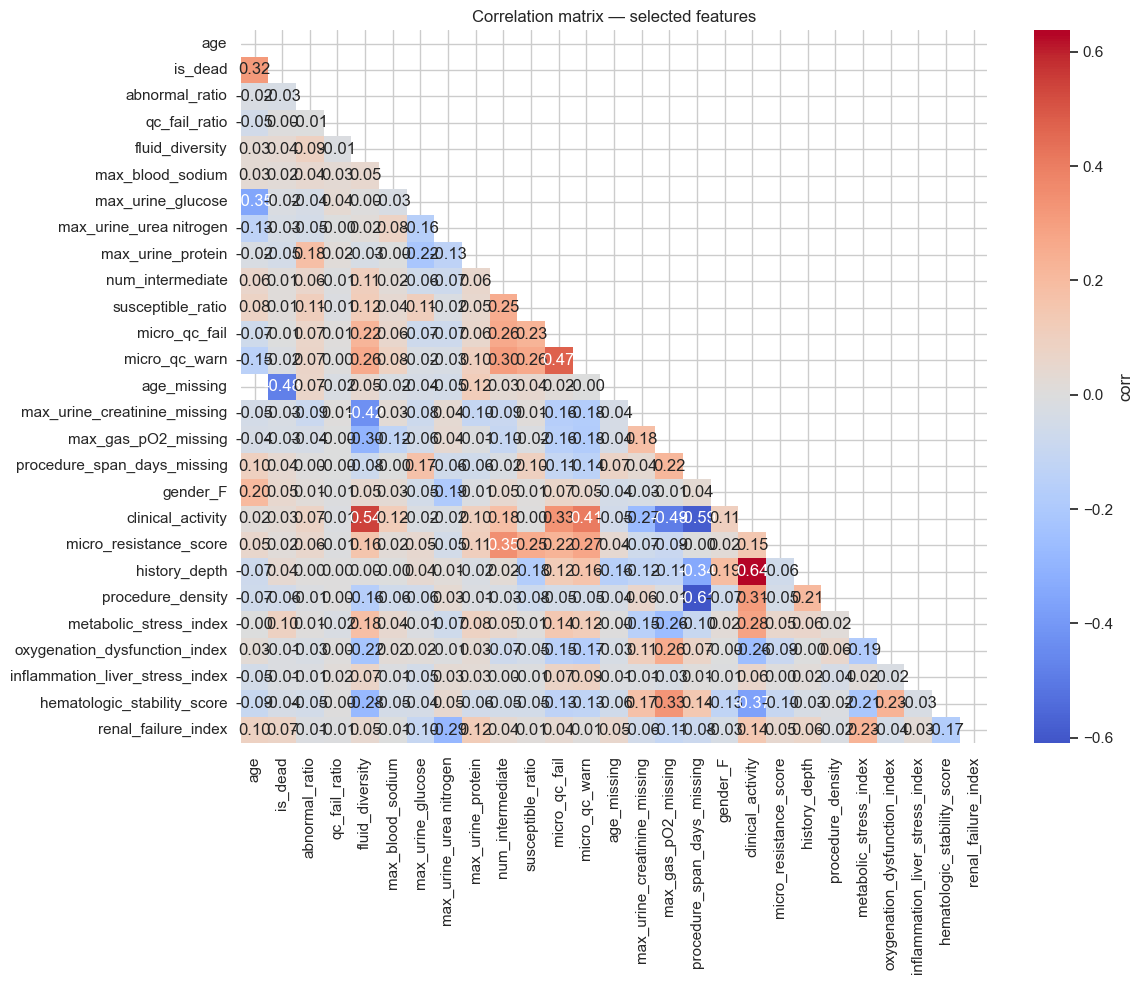

Correlation matrix saved to: Y:\Studium\3. Sem UniPI\Data Analytics 4 digital Health\Data\plots\selected_features_corr.png
Numeric features used (27): ['age', 'is_dead', 'abnormal_ratio', 'qc_fail_ratio', 'fluid_diversity', 'max_blood_sodium', 'max_urine_glucose', 'max_urine_urea nitrogen', 'max_urine_protein', 'num_intermediate', 'susceptible_ratio', 'micro_qc_fail', 'micro_qc_warn', 'age_missing', 'max_urine_creatinine_missing', 'max_gas_pO2_missing', 'procedure_span_days_missing', 'gender_F', 'clinical_activity', 'micro_resistance_score', 'history_depth', 'procedure_density', 'metabolic_stress_index', 'oxygenation_dysfunction_index', 'inflammation_liver_stress_index', 'hematologic_stability_score', 'renal_failure_index']
High-corr pairs (|r| >= 0.7): 0


In [419]:
# Ensure bool/has_ are numeric
sel = [c for c in patient_profile_new.columns if c not in ('subject_id', 'hadm_id')]
corr_df, high_pairs, used = corr_report(patient_profile_new, sel, data_dir=DATA_DIR, threshold=0.70)

## Save this uncorrelated broad profile

In [420]:
patient_profile_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5166 entries, 0 to 5165
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   subject_id                       5166 non-null   int64  
 1   hadm_id                          5166 non-null   float64
 2   age                              1363 non-null   float64
 3   is_dead                          4864 non-null   float64
 4   abnormal_ratio                   4855 non-null   float64
 5   qc_fail_ratio                    4855 non-null   float64
 6   fluid_diversity                  4855 non-null   float64
 7   max_blood_sodium                 4827 non-null   float64
 8   max_urine_glucose                208 non-null    float64
 9   max_urine_urea nitrogen          629 non-null    float64
 10  max_urine_protein                903 non-null    float64
 11  num_intermediate                 5166 non-null   float64
 12  susceptible_ratio   

In [422]:
patient_profile_new.describe().T

,count,mean,std,min,25%,50%,75%,max
subject_id,5166.0,1.539306e+07,3.073751e+06,1.000098e+07,1.267767e+07,1.539807e+07,1.812905e+07,1.999860e+07
hadm_id,5166.0,2.501832e+07,2.871364e+06,2.000446e+07,2.261127e+07,2.502269e+07,2.746995e+07,2.999967e+07
age,1363.0,6.897872e+01,1.497336e+01,1.800000e+01,6.000000e+01,7.000000e+01,8.100000e+01,9.500000e+01
is_dead,4864.0,8.182566e-02,2.741271e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
abnormal_ratio,4855.0,8.644463e-05,8.003173e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.980198e-02
qc_fail_ratio,4855.0,2.015424e-02,1.458749e-02,0.000000e+00,1.123596e-02,1.900238e-02,2.714055e-02,2.857143e-01
fluid_diversity,4855.0,1.552626e+00,6.457850e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00
max_blood_sodium,4827.0,1.410157e+02,3.430767e+00,9.700000e+01,1.390000e+02,1.410000e+02,1.430000e+02,1.750000e+02
max_urine_glucose,208.0,2.544171e+01,5.322073e+01,3.885000e+00,5.550000e+00,1.387500e+01,5.550000e+01,7.270000e+02
max_urine_urea nitrogen,629.0,5.343259e+02,2.851412e+02,7.200000e+01,3.190000e+02,4.980000e+02,6.850000e+02,1.612000e+03


In [423]:
patient_profile_new.to_csv(os.path.join(data_save_path, "patient_profile_final_large.csv"), index=False)

# FInal DU of patient prfile broad

In [424]:
patient_profile_small = patient_profile_new.copy()

In [425]:
patient_profile_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5166 entries, 0 to 5165
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   subject_id                       5166 non-null   int64  
 1   hadm_id                          5166 non-null   float64
 2   age                              1363 non-null   float64
 3   is_dead                          4864 non-null   float64
 4   abnormal_ratio                   4855 non-null   float64
 5   qc_fail_ratio                    4855 non-null   float64
 6   fluid_diversity                  4855 non-null   float64
 7   max_blood_sodium                 4827 non-null   float64
 8   max_urine_glucose                208 non-null    float64
 9   max_urine_urea nitrogen          629 non-null    float64
 10  max_urine_protein                903 non-null    float64
 11  num_intermediate                 5166 non-null   float64
 12  susceptible_ratio   

In [428]:
patient_profile_small.describe().T

,count,mean,std,min,25%,50%,75%,max
subject_id,5166.0,1.539306e+07,3.073751e+06,1.000098e+07,1.267767e+07,1.539807e+07,1.812905e+07,1.999860e+07
hadm_id,5166.0,2.501832e+07,2.871364e+06,2.000446e+07,2.261127e+07,2.502269e+07,2.746995e+07,2.999967e+07
age,1363.0,6.897872e+01,1.497336e+01,1.800000e+01,6.000000e+01,7.000000e+01,8.100000e+01,9.500000e+01
is_dead,4864.0,8.182566e-02,2.741271e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
abnormal_ratio,4855.0,8.644463e-05,8.003173e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.980198e-02
qc_fail_ratio,4855.0,2.015424e-02,1.458749e-02,0.000000e+00,1.123596e-02,1.900238e-02,2.714055e-02,2.857143e-01
fluid_diversity,4855.0,1.552626e+00,6.457850e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00
max_blood_sodium,4827.0,1.410157e+02,3.430767e+00,9.700000e+01,1.390000e+02,1.410000e+02,1.430000e+02,1.750000e+02
max_urine_glucose,208.0,2.544171e+01,5.322073e+01,3.885000e+00,5.550000e+00,1.387500e+01,5.550000e+01,7.270000e+02
max_urine_urea nitrogen,629.0,5.343259e+02,2.851412e+02,7.200000e+01,3.190000e+02,4.980000e+02,6.850000e+02,1.612000e+03


Distribution of age: std=14.973, mean=68.979
Distribution of is_dead: std=0.274, mean=0.082
Distribution of abnormal_ratio: std=0.001, mean=0.000
Distribution of qc_fail_ratio: std=0.015, mean=0.020
Distribution of fluid_diversity: std=0.646, mean=1.553
Distribution of max_blood_sodium: std=3.431, mean=141.016
Distribution of max_urine_glucose: std=53.221, mean=25.442
Distribution of max_urine_urea nitrogen: std=285.141, mean=534.326
Distribution of max_urine_protein: std=113.275, mean=85.226
Distribution of num_intermediate: std=0.247, mean=0.030
Distribution of susceptible_ratio: std=0.266, mean=0.109
Distribution of micro_qc_fail: std=0.672, mean=0.283
Distribution of micro_qc_warn: std=1.085, mean=0.570
Distribution of age_missing: std=0.441, mean=0.736
Distribution of max_urine_creatinine_missing: std=0.363, mean=0.844
Distribution of max_gas_pO2_missing: std=0.423, mean=0.767
Distribution of procedure_span_days_missing: std=0.470, mean=0.330
Distribution of gender_F: std=0.488, m

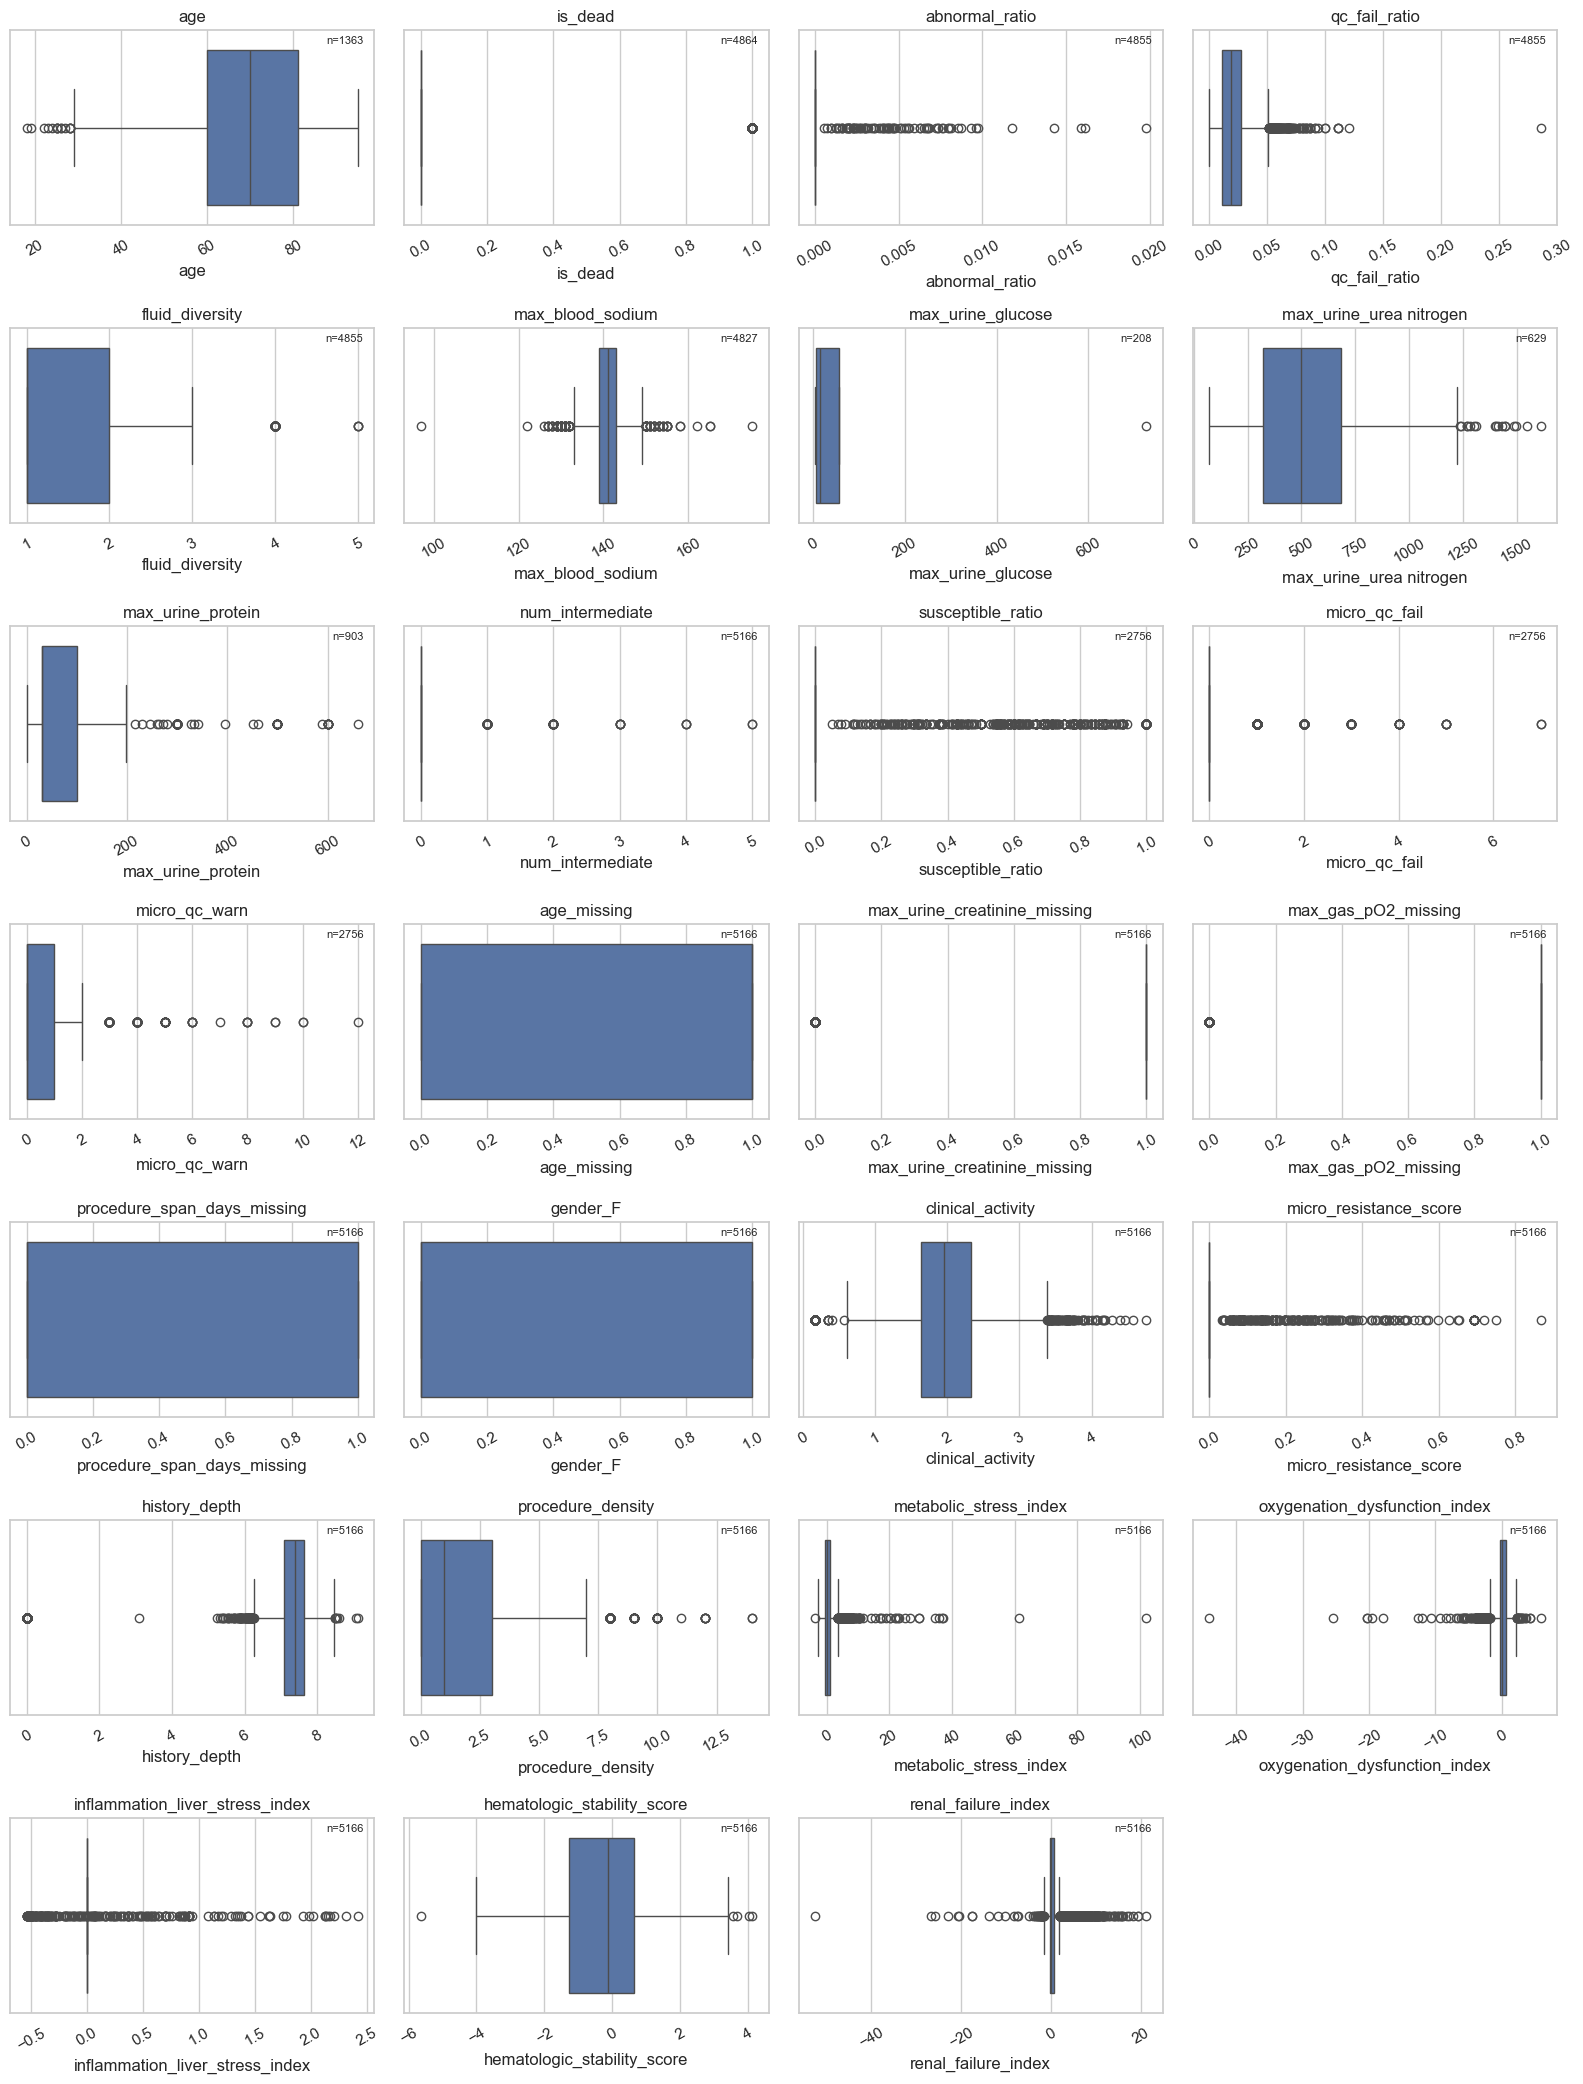

In [429]:
# Boxplots for all numeric columns in patient_profile_small (exclude ids)
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

num_cols = [c for c in patient_profile_small.select_dtypes(include=[np.number]).columns
            if c not in ('subject_id', 'hadm_id')]
if not num_cols:
    print("No numeric columns found for boxplots.")
else:
    cols_per_row = 4
    n = len(num_cols)
    rows = math.ceil(n / cols_per_row)
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 4, rows * 3))
    axes = axes.flatten() if n > 1 else [axes]

    for i, col in enumerate(num_cols):
        print(f"Distribution of {col}: std={patient_profile_small[col].std():.3f}, mean={patient_profile_small[col].mean():.3f}")
        ax = axes[i]
        # avoid plotting infinite values
        series = patient_profile_small[col].replace([np.inf, -np.inf], np.nan).dropna()
        if series.empty:
            ax.text(0.5, 0.5, "no data", ha='center', va='center')
            ax.set_title(col)
            continue
        sns.boxplot(x=series, ax=ax, color='C0')
        ax.set_title(col)
        ax.tick_params(axis='x', rotation=30)
        ax.text(0.97, 0.97, f"n={len(series)}", transform=ax.transAxes,
                ha='right', va='top', fontsize=8)

    # turn off any unused axes
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    os.makedirs(os.path.join(DATA_DIR, 'plots'), exist_ok=True)
    out_path = os.path.join(DATA_DIR, 'plots', 'patient_profile_small_boxplots_grid.png')
    plt.savefig(out_path, dpi=200, bbox_inches='tight')
    print(f"Boxplots saved to: {out_path}")
    plt.show()

## Handle NaNs: create broad profile 

In [432]:
patient_profile_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5166 entries, 0 to 5165
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   subject_id                       5166 non-null   int64  
 1   hadm_id                          5166 non-null   float64
 2   age                              1363 non-null   float64
 3   is_dead                          4864 non-null   float64
 4   abnormal_ratio                   4855 non-null   float64
 5   qc_fail_ratio                    4855 non-null   float64
 6   fluid_diversity                  4855 non-null   float64
 7   max_blood_sodium                 4827 non-null   float64
 8   max_urine_glucose                208 non-null    float64
 9   max_urine_urea nitrogen          629 non-null    float64
 10  max_urine_protein                903 non-null    float64
 11  num_intermediate                 5166 non-null   float64
 12  susceptible_ratio   

In [440]:
from sklearn.impute import SimpleImputer
df_work = patient_profile_small.copy()

# 1) Drop columns with too many NaNs or not desired
cols_to_drop = ['age', 'max_urine_glucose', 'max_urine_urea nitrogen', 'max_urine_protein']   # too sparse!
df_work = df_work.drop(columns=[c for c in cols_to_drop if c in df_work.columns], errors='ignore')

# impute with 0: columns where missingness usually implies "normalcy" or "neutrality"
for col in ['is_dead', 'susceptible_ratio', 'micro_qc_fail', 'micro_qc_warn', 'fluid_diversity', 'abnormal_ratio', 'qc_fail_ratio' ]:
    if col in df_work.columns:
        df_work[col] = pd.to_numeric(df_work[col], errors='coerce').fillna(0.0)

# 4) Median impute: Using 0 would make the patient look dead or biologically impossible + enough other data points
for col in ['max_blood_sodium']: 
    if col in df_work.columns:
        imp = SimpleImputer(strategy='median')
        df_work[[col]] = imp.fit_transform(df_work[[col]])

final_profile_broad = df_work.copy()
final_profile_broad.to_csv(os.path.join(data_save_path, "patient_profile_broad.csv"), index=False)
final_profile_broad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5166 entries, 0 to 5165
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   subject_id                       5166 non-null   int64  
 1   hadm_id                          5166 non-null   float64
 2   is_dead                          5166 non-null   float64
 3   abnormal_ratio                   5166 non-null   float64
 4   qc_fail_ratio                    5166 non-null   float64
 5   fluid_diversity                  5166 non-null   float64
 6   max_blood_sodium                 5166 non-null   float64
 7   num_intermediate                 5166 non-null   float64
 8   susceptible_ratio                5166 non-null   float64
 9   micro_qc_fail                    5166 non-null   float64
 10  micro_qc_warn                    5166 non-null   float64
 11  age_missing                      5166 non-null   int64  
 12  max_urine_creatinine

In [441]:
# 2. Identify 'Constant' columns (columns where everyone has the same value)
# In a smaller subset, many has_ columns often become 100% '1'
constant_cols = [col for col in final_profile_broad.columns if final_profile_broad[col].nunique() <= 1]

print(f"Dropping {len(constant_cols)} constant columns: {constant_cols}")

# 3. Drop them
df_clean_broad = final_profile_broad.drop(columns=constant_cols).copy()

# 4. Identify 'Redundant' has_ columns 
# If you have the numeric result (min/max), the has_ indicator is 100% redundant
redundant_indicators = []
for col in df_clean_broad.columns:
    if col.startswith('has_'):
        lab_name = col.replace('has_', '')
        # Check if a numeric version of this lab exists in the columns
        numeric_matches = [c for c in df_clean_broad.columns if lab_name in c and c != col]
        if numeric_matches:
            redundant_indicators.append(col)

print(f"Dropping {len(redundant_indicators)} redundant indicators: {redundant_indicators}")
df_clean_broad = df_clean_broad.drop(columns=redundant_indicators)

print(f"Final feature count for clustering: {len(df_clean_broad.columns)}")

Dropping 0 constant columns: []
Dropping 0 redundant indicators: []
Final feature count for clustering: 25


In [443]:
data_save_path

WindowsPath('Y:/Studium/3. Sem UniPI/Data Analytics 4 digital Health/data_analytics_4_health_unipi/data_analytics_4_health_unipi/Data')

In [444]:
final_profile_broad = df_clean_broad.copy()
final_profile_broad.to_csv(os.path.join(data_save_path, "patient_profile_broad_clean.csv"), index=False)

Distribution of is_dead: std=0.267, mean=0.077
Distribution of abnormal_ratio: std=0.001, mean=0.000
Distribution of qc_fail_ratio: std=0.015, mean=0.019
Distribution of fluid_diversity: std=0.727, mean=1.459
Distribution of max_blood_sodium: std=3.316, mean=141.015
Distribution of num_intermediate: std=0.247, mean=0.030
Distribution of susceptible_ratio: std=0.202, mean=0.058
Distribution of micro_qc_fail: std=0.510, mean=0.151
Distribution of micro_qc_warn: std=0.842, mean=0.304
Distribution of age_missing: std=0.441, mean=0.736
Distribution of max_urine_creatinine_missing: std=0.363, mean=0.844
Distribution of max_gas_pO2_missing: std=0.423, mean=0.767
Distribution of procedure_span_days_missing: std=0.470, mean=0.330
Distribution of gender_F: std=0.488, mean=0.390
Distribution of clinical_activity: std=0.680, mean=1.961
Distribution of micro_resistance_score: std=0.068, mean=0.012
Distribution of history_depth: std=1.778, mean=6.944
Distribution of procedure_density: std=2.371, mea

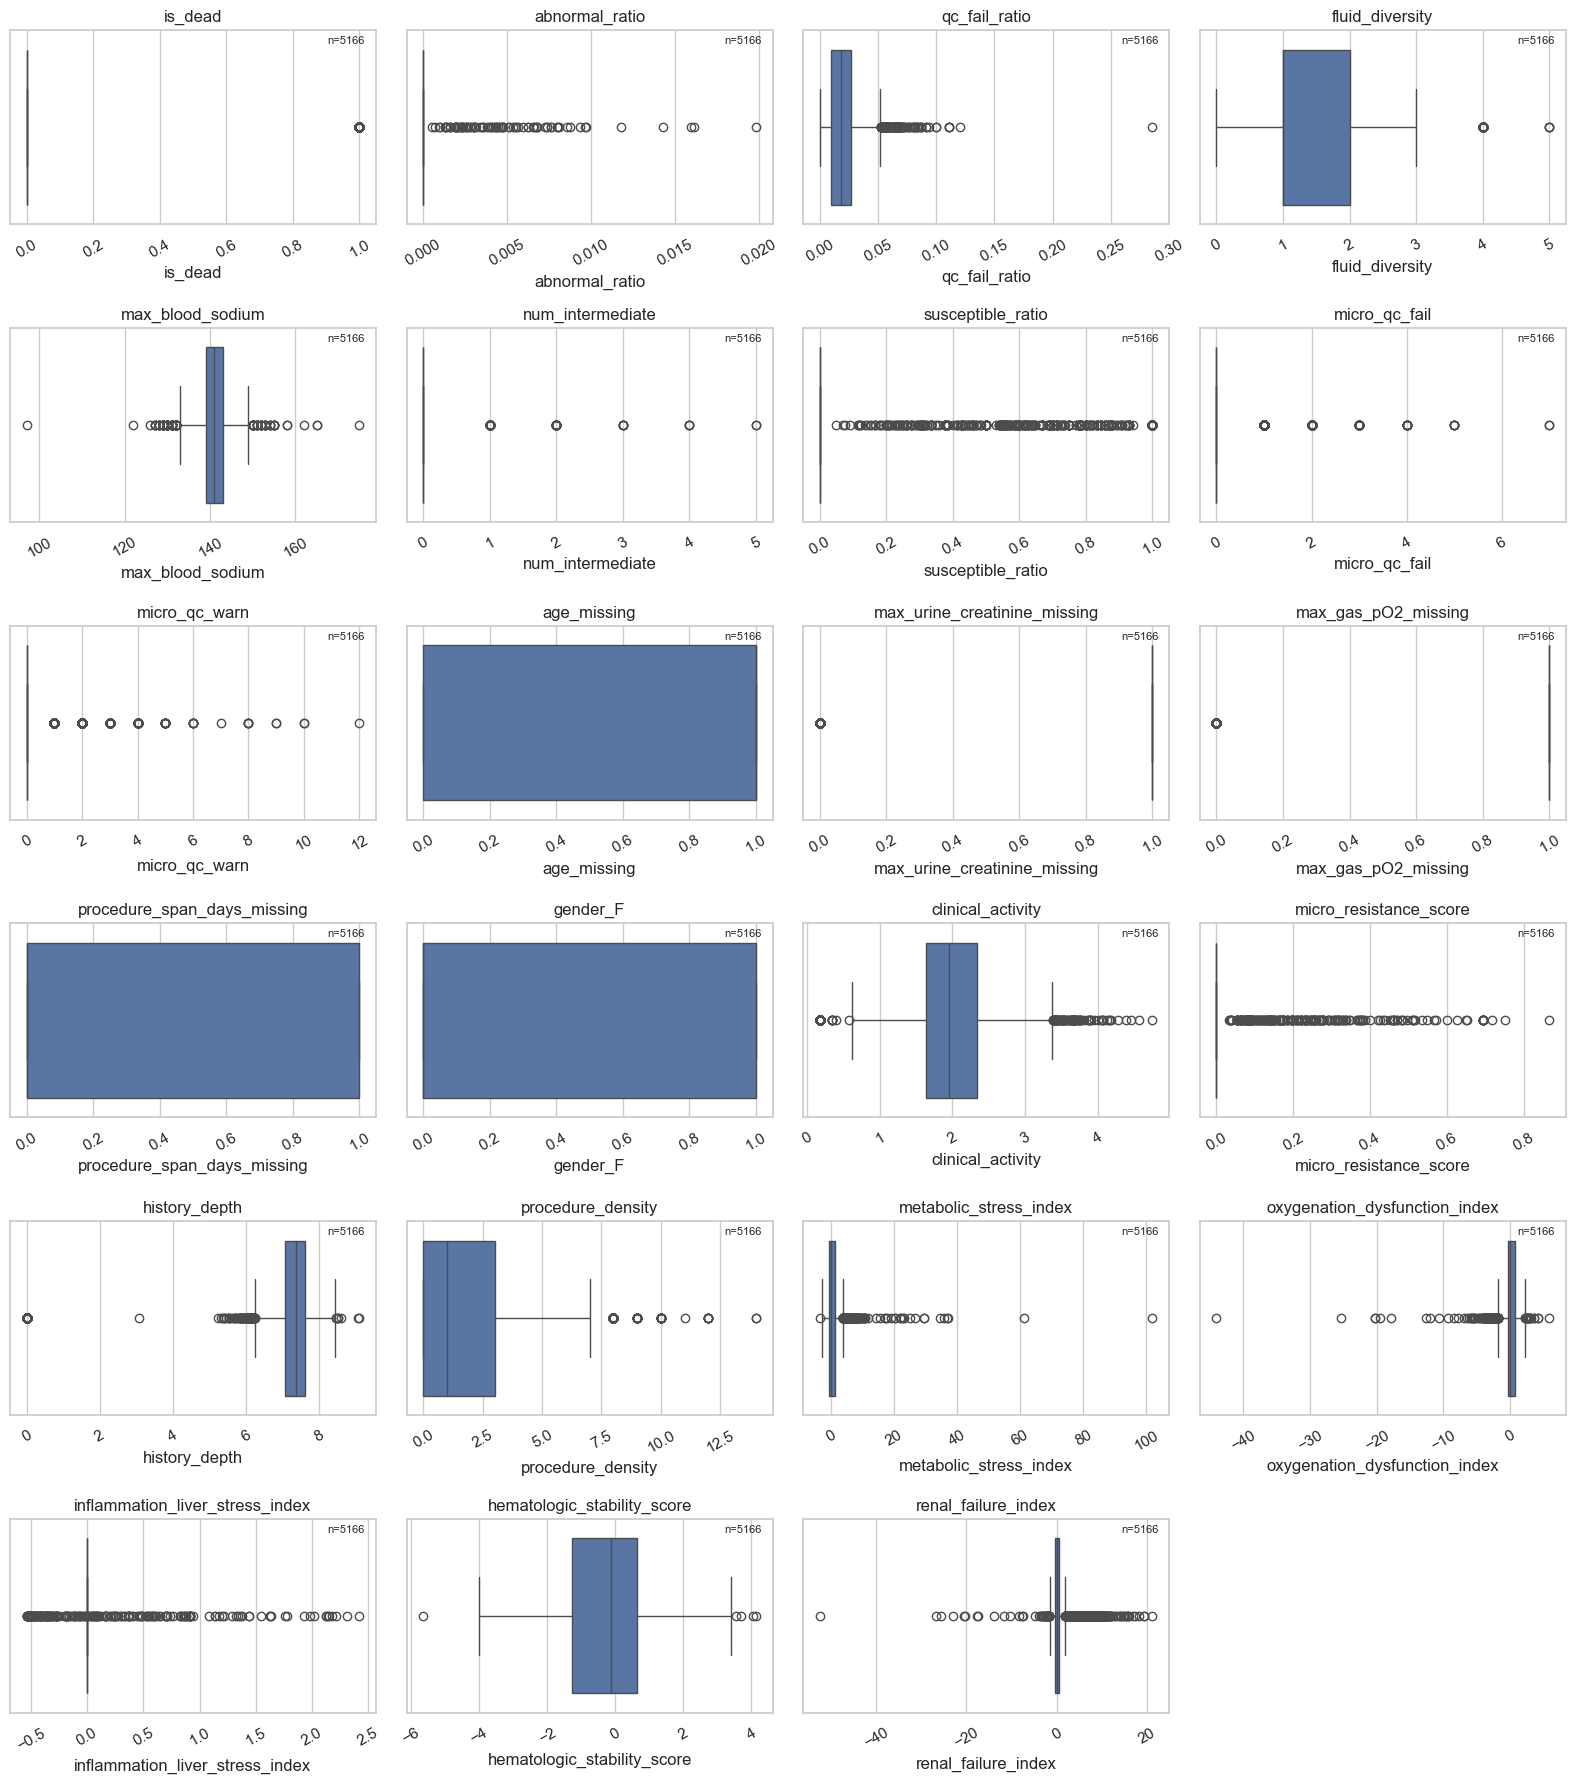

In [445]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

num_cols = [c for c in final_profile_broad.select_dtypes(include=[np.number]).columns
            if c not in ('subject_id', 'hadm_id')]
if not num_cols:
    print("No numeric columns found for boxplots.")
else:
    cols_per_row = 4
    n = len(num_cols)
    rows = math.ceil(n / cols_per_row)
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 4, rows * 3))
    axes = axes.flatten() if n > 1 else [axes]

    for i, col in enumerate(num_cols):
        print(f"Distribution of {col}: std={final_profile_broad[col].std():.3f}, mean={final_profile_broad[col].mean():.3f}")
        ax = axes[i]
        # avoid plotting infinite values
        series = final_profile_broad[col].replace([np.inf, -np.inf], np.nan).dropna()
        if series.empty:
            ax.text(0.5, 0.5, "no data", ha='center', va='center')
            ax.set_title(col)
            continue
        sns.boxplot(x=series, ax=ax, color='C0')
        ax.set_title(col)
        ax.tick_params(axis='x', rotation=30)
        ax.text(0.97, 0.97, f"n={len(series)}", transform=ax.transAxes,
                ha='right', va='top', fontsize=8)

    # turn off any unused axes
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    os.makedirs(os.path.join(DATA_DIR, 'plots'), exist_ok=True)
    out_path = os.path.join(DATA_DIR, 'plots', 'patient_profile_broad_boxplots_grid.png')
    plt.savefig(out_path, dpi=200, bbox_inches='tight')
    print(f"Boxplots saved to: {out_path}")
    plt.show()

In [448]:
log_features = [
    'procedure_density',
    'history_depth',
    'num_intermediate',
    'fluid_diversity'
]

print("Applying log1p to:", log_features)

for c in log_features:
    final_profile_broad[c] = np.log1p(final_profile_broad[c])
    
final_profile_broad.to_csv(os.path.join(data_save_path, "patient_profile_broad_clean_clustering.csv"), index=False)


Applying log1p to: ['procedure_density', 'history_depth', 'num_intermediate', 'fluid_diversity']


In [449]:
final_profile_broad.drop(columns=["procedure_span_days_missing"], errors='ignore', inplace=True)
final_profile_broad.to_csv(os.path.join(data_save_path, "patient_profile_broad_clean_clustering.csv"), index=False)